# Introduction

In this notebook, we have implemented some feature engineering solutions for the MNIST dataset in order to not use the pictures of each number as input to the ML models.

We will first have a quick look at the dataset itself. Then, we will focus on the feature engineering steps before training models on them. Eventually, we will conlude with several discussions.

Note: Hyperparameter tuning hasn't been implemented here as this was not the main task.

The MNIST dataset is a dataset composed of hand-written digits, from 0 to 9. Each digit is represented by an 8x8 matrix of integer values scaling from 0 to 16, 0 referring to a black pixel and 16 being a white one.

## Imports

In [ ]:
!pip install scikit-learn==0.24.1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import itertools
from itertools import combinations


import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score


import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.manifold import TSNE
import plotly.express as px

     |████████████████████████████████| 22.3MB 34.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

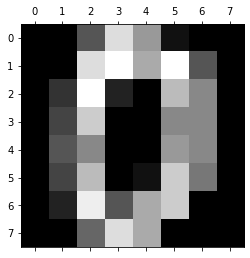





[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


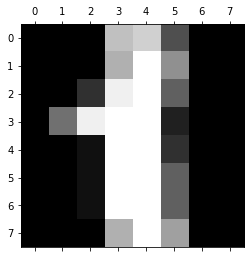





[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


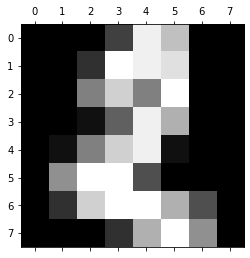





[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


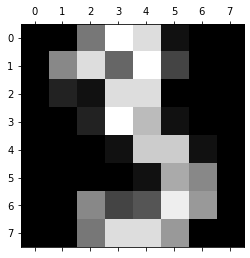





[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


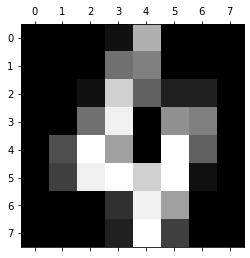





[[ 0.  0. 12. 10.  0.  0.  0.  0.]
 [ 0.  0. 14. 16. 16. 14.  0.  0.]
 [ 0.  0. 13. 16. 15. 10.  1.  0.]
 [ 0.  0. 11. 16. 16.  7.  0.  0.]
 [ 0.  0.  0.  4.  7. 16.  7.  0.]
 [ 0.  0.  0.  0.  4. 16.  9.  0.]
 [ 0.  0.  5.  4. 12. 16.  4.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]]


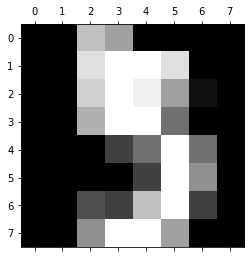





[[ 0.  0.  0. 12. 13.  0.  0.  0.]
 [ 0.  0.  5. 16.  8.  0.  0.  0.]
 [ 0.  0. 13. 16.  3.  0.  0.  0.]
 [ 0.  0. 14. 13.  0.  0.  0.  0.]
 [ 0.  0. 15. 12.  7.  2.  0.  0.]
 [ 0.  0. 13. 16. 13. 16.  3.  0.]
 [ 0.  0.  7. 16. 11. 15.  8.  0.]
 [ 0.  0.  1.  9. 15. 11.  3.  0.]]


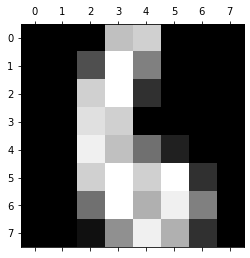





[[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]


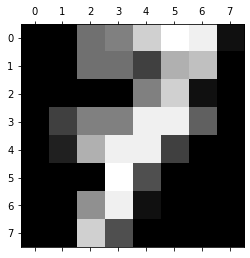





[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]


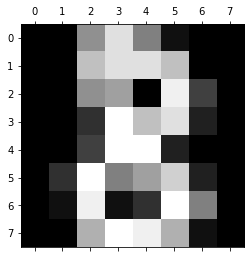





[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]


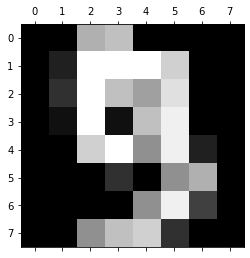

In [ ]:
# loading dataset
digits = load_digits()
plt.gray()

# showing first 10 digits
for iii in range(10):
    print(digits.images[iii])
    plt.matshow(digits.images[iii])
    plt.show()
    print('\n\n\n')

In [ ]:
# loading dataset as pandas dataframe
X, y = load_digits(return_X_y=True, as_frame=True)

# general information

print(X.info())
print(X.shape)

# almost balanced dataset
print(y.explode().value_counts())

# head and tail
print('\n', "Head :")
display(X.head())
print('\n', "Tail :")
display(X.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0



 Tail :


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,16.0,14.0,6.0,1.0,0.0,0.0,0.0,0.0,15.0,15.0,8.0,15.0,0.0,0.0,0.0,0.0,5.0,16.0,16.0,10.0,0.0,0.0,0.0,0.0,12.0,15.0,15.0,12.0,0.0,0.0,0.0,4.0,16.0,6.0,4.0,16.0,6.0,0.0,0.0,8.0,16.0,10.0,8.0,16.0,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


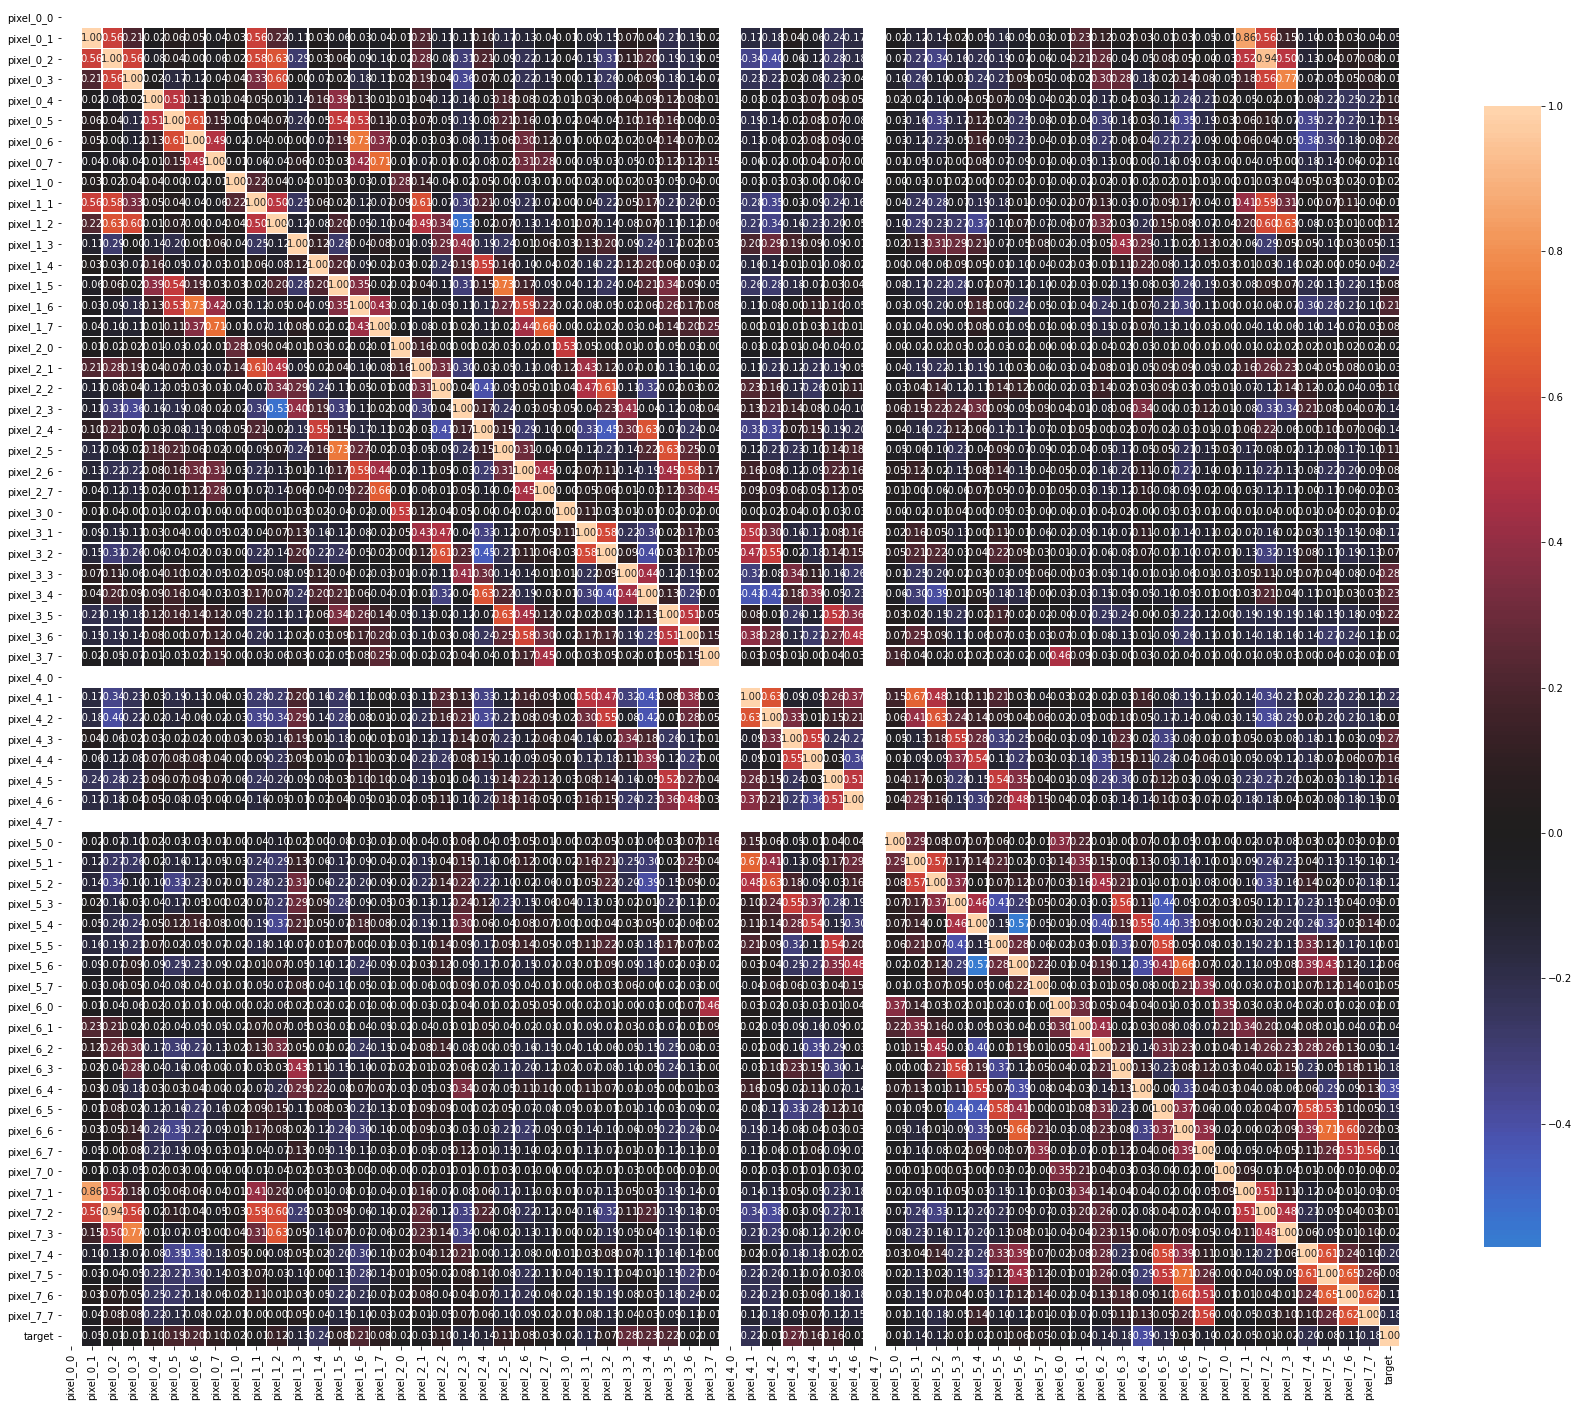

In [ ]:
# correlation matrix (not very readable)
X, y = load_digits(return_X_y=True, as_frame=True)

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, annot_kws={'size':10})
    plt.show()

df = pd.concat([X,y], axis=1)
correlation_heatmap(df)

In [ ]:
# sorted correlation array of target column

df = pd.concat([X,y], axis=1)
df_target = df.corr()['target']
target_corrs = abs(df_target.unique())
target_corrs[::-1].sort()
print(target_corrs)

[       nan 1.         0.39062532 0.27546827 0.26588041 0.24448928
 0.23415936 0.22341336 0.21613017 0.20966448 0.19734338 0.19608304
 0.19336165 0.18945181 0.18192885 0.18103743 0.16923143 0.16234153
 0.16185495 0.14297954 0.14097385 0.13769384 0.13531378 0.12906682
 0.12276627 0.12010377 0.11400687 0.11381571 0.1010852  0.10080073
 0.09931153 0.09709358 0.08092467 0.07910043 0.07889514 0.07682101
 0.07272944 0.0608203  0.05394984 0.05183405 0.04675404 0.03910321
 0.02698194 0.02668164 0.02606327 0.02433592 0.0232249  0.02319875
 0.02081336 0.02051819 0.01979033 0.0153529  0.01475289 0.01243948
 0.01183637 0.01178042 0.01148913 0.01051091 0.00809302 0.0073275
 0.00636697 0.00634235 0.00615259]


From these insights, we can think, that directly using the value of some pixels can yield promising results as the correlation rate is pretty high.
This will partly lead of feature engineering work.

Note: Two values are missing, I don't know why as I didn't have these errors for my tests...

# Feature engineering

## Pixel value

First, we will just use the value of the pixel as a feature.

In [ ]:
X, y = load_digits(return_X_y=True, as_frame=True)


# 20 highest pixels according to their correlation with target
df = pd.concat([X,y], axis=1)
df_target = df.corr()['target']
target_corrs = abs(df_target.unique())
target_corrs[::-1].sort()
print("20 pixels with highest correlation :\n", target_corrs[2:22])

20 pixels with highest correlation :
 [0.39062532 0.27546827 0.26588041 0.24448928 0.23415936 0.22341336
 0.21613017 0.20966448 0.19734338 0.19608304 0.19336165 0.18945181
 0.18192885 0.18103743 0.16923143 0.16234153 0.16185495 0.14297954
 0.14097385 0.13769384]


In [ ]:
def pixel(X, y):

    """
    Creating the training and testing datasets with top 20 correlation level of pixels.
    """

    kf = KFold(n_splits=5, shuffle=True, random_state=7)

    # top n pixels
    pixel_element = 20 + 2

    # correlation of training data
    pixel_train_corr = []
    # correlation of testing data
    pixel_test_corr = []

    # training and testint datasets returned
    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []


    # KFold splitting
    for train, test in kf.split(y):

        # splitting datasets
        X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
        y_train = pd.Series(np.array(y)[train], name='target')
        X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
        y_test = pd.Series(np.array(y)[test], name='target')


        # training dataset generation

        # correlation rate with training data
        df = pd.concat([X_train, y_train], axis=1)
        df_corr = df.corr()['target']
        target_corrs = abs(df_corr.unique())
        target_corrs[::-1].sort()

        # keeping top n highest pixels
        high_pxl = df[df_corr.index[abs(df_corr['target']) >= abs(target_corrs[pixel_element])].tolist()[0]]

        # scaling data
        X_train = pd.DataFrame(preprocessing.StandardScaler().fit_transform(high_pxl.drop(['target'], axis=1)), columns=list(high_pxl.drop(['target'], axis=1)))
        
        pixel_train_corr.append(target_corrs[2:22])
        
        # keeping training dataset
        X_train_list.append(X_train)
        y_train_list.append(y_train)


        
        # testing dataset generation
        
        df_test = pd.concat([X_test, y_test], axis=1)
        
        # keeping top n highest pixels
        high_pxl = df_test[df_corr.index[abs(df_corr['target']) >= abs(target_corrs[pixel_element])].tolist()[0]]

        # scaling data
        X_test = pd.DataFrame(preprocessing.StandardScaler().fit_transform(high_pxl.drop(['target'], axis=1)), columns=list(high_pxl.drop(['target'], axis=1)))

        
        pixel_test_corr.append(target_corrs[2:22])

        # keeping testing dataset
        X_test_list.append(X_test)
        y_test_list.append(y_test)

    # printing training and testing correlation rates
    print(pixel_train_corr)
    print(pixel_test_corr)

    return X_train_list, y_train_list, X_test_list, y_test_list




## Black / White pixels

A simple code showing the correlation array between the number of white pixels detected and the target. Bad results led to this feature not being further used.

In [ ]:
X, y = load_digits(return_X_y=True, as_frame=True)
digits = load_digits()

# threshold value for a pixel to be considered black
for jjjj in range(17):

    # number of white pixels
    X['White'] = 0
    digits = load_digits()

    # parsing digit matrix
    for i in range(X.shape[0]):
        for j in range(8):
            for k in range(8):
                digits.images[i][j][k] = 1 if digits.images[i][j][k] > jjjj else 0

        X.loc[i, 'White'] = np.matrix(digits.images[i]).sum()
    df = pd.concat([X,y], axis=1)

    df_corr = df.corr()

    # correlation rate between number of white pixels
    print(jjjj, ":", df_corr['target']['White'])


0 : 0.09850152620799384
1 : 0.07779631526100722
2 : 0.04679163869830841
3 : 0.04794920535122624
4 : 0.047060604655424706
5 : 0.06300092269280033
6 : 0.05945931565677951
7 : 0.03351881874782239
8 : 0.08803775454719685
9 : 0.057156636430415596
10 : 0.028744761609937105
11 : -0.008971405772469626
12 : -0.028369192035198953
13 : -0.07514842295870351
14 : -0.12577368842965908
15 : -0.15847199445768506
16 : nan


<Figure size 432x288 with 0 Axes>

## Simple hole detection

Holes can help caracterize digits. For example, the digit 6 has one hole and the digit 8 has 2. Here, we just limited the detection to one pixel.
A hole has been defined as a pixel with a value strictly lower than those of its for immediate neighbors. According to the following code, setting this difference to 1 has given the highest correlation rate with the target. This will be the kept value.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=7)

# correlation of training data
best_train_corr = []
# correlation of testing data
best_test_corr = []


# KFold splitting
for train, test in kf.split(y):
    
    temp_corr = []

    # splitting datasets
    X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
    y_train = pd.Series(np.array(y)[train], name='target')
    X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
    y_test = pd.Series(np.array(y)[test], name='target')
    

    # difference value between central and neighbor pixels
    for difference in range(1, 17):

        # training dataset

        # number of holes
        X_train['Holes'] = 0    

        for i, _ in X_train.iterrows():
            # parsing digit matrix to detect holes
            for j in range(1, 7):
                for k in range(1, 7):
                    value = X_train.loc[i, 'pixel_' + str(j) + '_' + str(k)]
                
                    if (X_train.loc[i, 'pixel_' + str(j + 1) + '_' + str(k)] - value >= difference) \
                    and (X_train.loc[i, 'pixel_' + str(j - 1) + '_' + str(k)] - value >= difference) \
                    and (X_train.loc[i, 'pixel_' + str(j) + '_' + str(k + 1)] - value >= difference) \
                    and (X_train.loc[i, 'pixel_' + str(j) + '_' + str(k - 1)] - value >= difference):
                            X_train.loc[i, 'Holes'] += 1

        # correlation rate
        df = pd.concat([X_train, y_train], axis=1)
        df_corr = df.corr()
        temp_corr.append(df_corr['target']['Holes'])

    best_train_corr.append((np.nanargmax(temp_corr), max(temp_corr)))


    temp_corr = []

    # difference value between central and neighbor pixels
    for difference in range(1, 17):

        # testing dataset

        X_test['Holes'] = 0    


        for i, _ in X_test.iterrows():
            # parsing digit matrix to detect holes
            for j in range(1, 7):
                for k in range(1, 7):
                    value = X_test.loc[i, 'pixel_' + str(j) + '_' + str(k)]
    
                    if (X_test.loc[i, 'pixel_' + str(j + 1) + '_' + str(k)] - value >= difference) \
                    and (X_test.loc[i, 'pixel_' + str(j - 1) + '_' + str(k)] - value >= difference) \
                    and (X_test.loc[i, 'pixel_' + str(j) + '_' + str(k + 1)] - value >= difference) \
                    and (X_test.loc[i, 'pixel_' + str(j) + '_' + str(k - 1)] - value >= difference):
                            X_test.loc[i, 'Holes'] += 1

        # correlation rate
        df = pd.concat([X_test, y_test], axis=1)
        df_corr = df.corr()
        temp_corr.append(df_corr['target']['Holes'])

    best_test_corr.append((np.nanargmax(temp_corr), max(temp_corr)))



print(best_train_corr)
print(best_test_corr)

[(0, 0.44461567016130255), (0, 0.45499059744826276), (0, 0.45630065703970524), (0, 0.45745834913187755), (0, 0.4745020217081403)]
[(0, 0.5064817174711261), (0, 0.46141416236253063), (0, 0.4629926599044539), (0, 0.4599983594217266), (0, 0.39279321741944817)]


In [ ]:
def holes(X, y):

    """
    Creating the training and testing datasets with hole detection.
    """

    difference = 1
    # number of holes
    X['Holes'] = 0

    kf = KFold(n_splits=5, shuffle=True, random_state=7)

    # correlation of training data
    holes_train_corr = []
    # correlation of testing data
    holes_test_corr = []

    # training and testing datasets returned
    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []


    # KFold splitting
    for train, test in kf.split(y):

        # splitting datasets
        X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
        y_train = pd.Series(np.array(y)[train], name='target')
        X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
        y_test = pd.Series(np.array(y)[test], name='target')
        


        # training dataset generation

        for i, _ in X_train.iterrows():
            # parsing digit matrix to detect holes
            for j in range(1, 7):
                for k in range(1, 7):
                    value = X_train.loc[i, 'pixel_' + str(j) + '_' + str(k)]
                
                    if (X_train.loc[i, 'pixel_' + str(j + 1) + '_' + str(k)] - value >= difference) \
                    and (X_train.loc[i, 'pixel_' + str(j - 1) + '_' + str(k)] - value >= difference) \
                    and (X_train.loc[i, 'pixel_' + str(j) + '_' + str(k + 1)] - value >= difference) \
                    and (X_train.loc[i, 'pixel_' + str(j) + '_' + str(k - 1)] - value >= difference):
                        X_train.loc[i, 'Holes'] += 1

        # correlation rate        
        df = pd.concat([X_train, y_train], axis=1)
        df_corr = df.corr()
        holes_train_corr.append(df_corr['target']['Holes'])
        
        # keeping training dataset
        X_train_list.append(X_train[['Holes']])
        y_train_list.append(y_train)



        # testing dataset generation
        
        for i, _ in X_test.iterrows():
            # parsing digit matrix to detect holes
            for j in range(1, 7):
                for k in range(1, 7):
                    value = X_test.loc[i, 'pixel_' + str(j) + '_' + str(k)]
                
                    if (X_test.loc[i, 'pixel_' + str(j + 1) + '_' + str(k)] - value >= difference) \
                    and (X_test.loc[i, 'pixel_' + str(j - 1) + '_' + str(k)] - value >= difference) \
                    and (X_test.loc[i, 'pixel_' + str(j) + '_' + str(k + 1)] - value >= difference) \
                    and (X_test.loc[i, 'pixel_' + str(j) + '_' + str(k - 1)] - value >= difference):
                        X_test.loc[i, 'Holes'] += 1


        # correlation rate
        df = pd.concat([X_test, y_test], axis=1)
        df_corr = df.corr()
        holes_test_corr.append(df_corr['target']['Holes'])
        
        # keeping testing dataset
        X_test_list.append(X_test[['Holes']])
        y_test_list.append(y_test)


    # printing training and testing correlation rates
    print(holes_train_corr)
    print(holes_test_corr)

    return X_train_list, y_train_list, X_test_list, y_test_list




## Variance X and Y

In this code, we focus on the variance according to the x axis and according to the y axis. According to the k-fold splitting, the best variance line to focus on is the 7th one and the best column variance is the 6th one. Second and third best are not consistently the same but it might be useful to include those appearing the most frequently at the top for model training and testing.


With these results, we will keep the variance of lines 2, 4 and 7, and of columns 2, 5 and 6.

In [ ]:
X, y = load_digits(return_X_y=True, as_frame=True)



kf = KFold(n_splits=5, shuffle=True, random_state=7)

x_train_corr = []
y_train_corr = []
x_test_corr = []
y_test_corr = []


# KFold splitting
for train, test in kf.split(y):

    X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
    y_train = pd.Series(np.array(y)[train], name='target')
    X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
    y_test = pd.Series(np.array(y)[test], name='target')
    


    # train creating variance columns
    for j in range(8):
        X_train['x' + str(j)] = 0
        X_train['y' + str(j)] = 0
    
    # training dataset variance calculation
    for i, _ in X_train.iterrows():
        for j in range(8):

            x_array = np.array([X_train.loc[i, 'pixel_' + str(j) + '_' + str(k)] for k in range(8)])
            y_array = np.array([X_train.loc[i, 'pixel_' + str(k) + '_' + str(j)] for k in range(8)])

            X_train.loc[i, 'x' + str(j)] = np.var(x_array)
            X_train.loc[i, 'y' + str(j)] = np.var(y_array)

    df = pd.concat([X_train, y_train], axis=1)

    df_corr = df.corr()
    
    x_train_corr.append([df_corr['target']['x' + str(k)] for k in range(8)])
    y_train_corr.append([df_corr['target']['y' + str(k)] for k in range(8)])
    
    


    # test creating variance columns
    for j in range(8):
        X_test['x' + str(j)] = 0
        X_test['y' + str(j)] = 0
    
    # testing dataset variance calculation    
    for i, _ in X_test.iterrows():
        for j in range(8):

            x_array = np.array([X_test.loc[i, 'pixel_' + str(j) + '_' + str(k)] for k in range(8)])
            y_array = np.array([X_test.loc[i, 'pixel_' + str(k) + '_' + str(j)] for k in range(8)])

            X_test.loc[i, 'x' + str(j)] = np.var(x_array)
            X_test.loc[i, 'y' + str(j)] = np.var(y_array)

    df = pd.concat([X_test, y_test], axis=1)

    df_corr = df.corr()


    x_test_corr.append([df_corr['target']['x' + str(k)] for k in range(8)])
    y_test_corr.append([df_corr['target']['y' + str(k)] for k in range(8)])



# print(x_train_corr)
# print(y_train_corr)
# print(x_test_corr)
# print(y_test_corr)

# sorting list of correlation scores in decreasing order
x_train_corr_abs = [sorted([(abs(truc[i]), i) for i in range(len(truc))], reverse=True) for truc in x_train_corr]
y_train_corr_abs = [sorted([(abs(truc[i]), i) for i in range(len(truc))], reverse=True) for truc in y_train_corr]
x_test_corr_abs = [sorted([(abs(truc[i]), i) for i in range(len(truc))], reverse=True) for truc in x_test_corr]
y_test_corr_abs = [sorted([(abs(truc[i]), i) for i in range(len(truc))], reverse=True) for truc in y_test_corr]

# print(x_train_corr_abs)
# print(y_train_corr_abs)
# print(x_test_corr_abs)
# print(y_test_corr_abs)


# keeping top 3 lines/columns for variance according to correlation rate with target
top_three_x_train = [0 for i in range(8)]
top_three_y_train = [0 for i in range(8)]
top_three_x_test = [0 for i in range(8)]
top_three_y_test = [0 for i in range(8)]

for i in range(len(y_test_corr_abs)):

    for j in range(3):
        top_three_x_train[x_train_corr_abs[i][j][1]] += 1
        top_three_y_train[y_train_corr_abs[i][j][1]] += 1
        top_three_x_test[x_test_corr_abs[i][j][1]] += 1
        top_three_y_test[y_test_corr_abs[i][j][1]] += 1
        
print(top_three_x_train)
print(top_three_y_train)
print(top_three_x_test)
print(top_three_y_test)

[0, 5, 0, 5, 0, 0, 5, 0]
[0, 4, 0, 0, 5, 5, 0, 1]
[0, 3, 0, 3, 2, 1, 5, 1]
[0, 2, 1, 0, 3, 5, 1, 3]


In [ ]:
def var_x_y(X, y):

    """
    Creating the training and testing datasets with variance over lines and columns.
    """
    
    # kept lines
    x_var = [1, 3, 6]
    # kept columns
    y_var = [1, 4, 5]

    # dataset columns creation
    for j in x_var:
        X['x' + str(j)] = 0
    for j in y_var:
        X['y' + str(j)] = 0

    kf = KFold(n_splits=5, shuffle=True, random_state=7)


    holes_train_corr = []
    holes_test_corr = []

    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []


    # KFold splitting
    for train, test in kf.split(y):


        X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
        y_train = pd.Series(np.array(y)[train], name='target')
        X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
        y_test = pd.Series(np.array(y)[test], name='target')
        


        # training dataset generation
        for i, _ in X_train.iterrows():

            # getting variance for lines
            for j in x_var:
                x_array = np.array([X_train.loc[i, 'pixel_' + str(j) + '_' + str(k)] for k in range(8)])
                X_train.loc[i, 'x' + str(j)] = np.var(x_array)

            # getting variance for columns
            for j in y_var:
                y_array = np.array([X_train.loc[i, 'pixel_' + str(k) + '_' + str(j)] for k in range(8)])
                X_train.loc[i, 'y' + str(j)] = np.var(y_array)


        df = pd.concat([X_train, y_train], axis=1)
        df_corr = df.corr()

        # selecting columns to be returned
        columns_to_return = ['x' + str(j) for j in x_var] + ['y' + str(j) for j in y_var]

        holes_train_corr.append(df_corr['target'][columns_to_return])

        # scaling        
        X_train = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_train[columns_to_return]), columns=columns_to_return)
        

        X_train_list.append(X_train)
        y_train_list.append(y_train)


        # testing dataset generation
        for i, _ in X_test.iterrows():
            
            # getting variance for lines
            for j in x_var:
                x_array = np.array([X_test.loc[i, 'pixel_' + str(j) + '_' + str(k)] for k in range(8)])
                X_test.loc[i, 'x' + str(j)] = np.var(x_array)

            # getting variance for columns
            for j in y_var:
                y_array = np.array([X_test.loc[i, 'pixel_' + str(k) + '_' + str(j)] for k in range(8)])
                X_test.loc[i, 'y' + str(j)] = np.var(y_array)

        df = pd.concat([X_test, y_test], axis=1)
        df_corr = df.corr()

        # selecting columns to be returned        
        columns_to_return = ['x' + str(j) for j in x_var] + ['y' + str(j) for j in y_var]

        holes_test_corr.append(df_corr['target'][columns_to_return])

        # scaling
        X_test = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_test[columns_to_return]), columns=columns_to_return)
        
        X_test_list.append(X_test)
        y_test_list.append(y_test)



    print(holes_train_corr)
    print(holes_test_corr)

    return X_train_list, y_train_list, X_test_list, y_test_list




## Full variance

Here, the full variance of the digit is calculated. However, the correlation being very low, it has been decided to not continue further with this feature.

In [ ]:
X, y = load_digits(return_X_y=True, as_frame=True)



kf = KFold(n_splits=5, shuffle=True, random_state=7)

x_train_var = []
x_test_var = []


# KFold splitting
for train, test in kf.split(y):

    X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
    y_train = pd.Series(np.array(y)[train], name='target')
    X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
    y_test = pd.Series(np.array(y)[test], name='target')
    
    # full digit matrix variance
    X_train['Var'] = 0
    
    # variance calculation
    for i, _ in X_train.iterrows():
        X_train.loc[i, 'Var'] = np.var([X_train.loc[i, 'pixel_' + str(j) + '_' + str(k)] for k in range(8) for j in range(8)])
        
    df = pd.concat([X_train, y_train], axis=1)
    df_corr = df.corr()
    x_train_var.append(df_corr['target']['Var'])
    



    X_test['Var'] = 0
    
    # variance calculation
    for i, _ in X_test.iterrows():
        X_test.loc[i, 'Var'] = np.var([X_test.loc[i, 'pixel_' + str(j) + '_' + str(k)] for k in range(8) for j in range(8)])

    df = pd.concat([X_test, y_test], axis=1)
    df_corr = df.corr()
    x_test_var.append(df_corr['target']['Var'])



print(x_train_var)
print(x_test_var)


[-0.05839299095379297, -0.06741157858770963, -0.09861232180510869, -0.0915426685148554, -0.0658114711097553]
[-0.13872907428082634, -0.09912868572314389, 0.006532053000979485, -0.017625277512522648, -0.12119154941768102]


## Length - Angle

The following cells will aim at retrieving the size of the longest straight line in the picture as well as it's angle to the horizontal axis.

Even if the results presented aren't good, we still wanted to try further variations.

In [ ]:
def max_points(number):

    """
    Returning coordinates of pixels above 10 ligth level.
    """

    max_points = []

    for i in range(8):
        for j in range(8):
            if number[i][j] > 10:
                max_points.append((i, j))
    
    return max_points

def all_paths(max_points, number):

    """
    Creating all possible paths between whitest pixels
    """

    to_path = list(combinations(max_points, 2))
    all_paths = []


    for pathing in to_path:

        x_diff = pathing[1][0] - pathing[0][0]
        y_diff = pathing[1][1] - pathing[0][1]

        straight, diag = abs(x_diff) - abs(y_diff), min(abs(x_diff), abs(y_diff))

        to_compose = []

        for i in range(abs(straight)):
            if abs(x_diff) > abs(y_diff) and x_diff > 0:
                to_compose.append((1,0))
            elif abs(x_diff) > abs(y_diff) and x_diff < 0:
                to_compose.append((-1,0))
            elif abs(y_diff) > abs(x_diff) and y_diff > 0:
                to_compose.append((0,1))
            elif abs(y_diff) > abs(x_diff) and y_diff < 0:
                to_compose.append((0,-1))

        for i in range(diag):
            if x_diff > 0 and y_diff > 0:
                to_compose.append((1,1))
            elif x_diff > 0 and y_diff < 0:
                to_compose.append((1,-1))
            elif x_diff < 0 and y_diff > 0:
                to_compose.append((-1,1))
            elif x_diff < 0 and y_diff < 0:
                to_compose.append((-1,-1))
        
        all_permutations = list(itertools.permutations(to_compose))

        purified = list(set(all_permutations))

        

        for path in purified:

            temp_path = [(pathing[0][0], pathing[0][1])]
            x_current, y_current = pathing[0][0], pathing[0][1]
            path_possibilities = []

            for move in path:
                x_current, y_current = x_current + move[0], y_current + move[1]

                if number[x_current][y_current] > 6:
                    temp_path.append((x_current, y_current))
                else:
                    break
            if len(temp_path) > 2:
                path_possibilities.append(temp_path)

        if path_possibilities:
            all_paths.append(path_possibilities)

        
    return all_paths


def optimized_paths(all_paths, number):

    """
    Keeping best/whitest path between each couple of top pixels.
    """

    optimized_paths = []

    for path_family in all_paths:
        optimized_family = []

        for path_variation in path_family:
            optimized_variation = []
            
            i = 0
            last = 1

            while i < len(path_variation) - 2:
                x_0, y_0 = path_variation[i][0], path_variation[i][1]
                x_1, y_1 = path_variation[i + 1][0], path_variation[i + 1][1]
                x_2, y_2 = path_variation[i + 2][0], path_variation[i + 2][1]

                
                if abs(x_0 - x_2) == 1 and abs(y_0 - y_2) == 1:
                    if (x_0, y_0) not in optimized_variation:
                        optimized_variation.append((x_0, y_0))
                    optimized_variation.append((x_2, y_2))
                    i += 2
                else:
                    if (x_0, y_0) not in optimized_variation:
                        optimized_variation.append((x_0, y_0))
                    i += 1
            

            if path_variation[-2] not in optimized_variation and path_variation[-1] not in optimized_variation:
                optimized_variation.append(path_variation[-2])
            if path_variation[-1] not in optimized_variation:
                optimized_variation.append(path_variation[-1])

        

            optimized_family.append(optimized_variation)

        if len(optimized_family) > 1:
            max_white = []
            for path_variation in optimized_family:
                temp_white = 0
                for j in range(len(path_variation)):
                    temp_white += number[path_variation[j][0]][path_variation[j][1]]
                max_white.append(temp_white)
        
            optimized_family = optimized_family[np.argmax(max_white)]
        
        optimized_paths.append(optimized_family)


    return optimized_paths


def best_path(optimized_paths, number):

    """
    Keeping best path (whitest) out of all the different paths for a digit.
    """
    
    best_path = []

    for best_family in optimized_paths:
        max_white = []
        for path in best_family:
            temp_white = 0
            for j in range(len(path)):
                temp_white += number[path[j][0]][path[j][1]]
            max_white.append(temp_white)

        best_path.append(best_family[np.argmax(max_white)])

    return best_path


def best_length_angle(best_path):

    """
    Calculating length and angle of given path.
    """

    length_angle = []

    for path in best_path:

        i = 0
        length = 0
        while i < len(path) - 1:
            
            x_0, y_0 = path[i][0], path[i][1]
            x_1, y_1 = path[i + 1][0], path[i + 1][1]

            if abs(x_0 - x_1) == 1 and abs(y_0 - y_1) == 1:
                length += np.sqrt(2)

            else:
                length += 1

            i += 1
        


        x_0, y_0 = path[0][0], path[0][1]
        x_1, y_1 = path[-1][0], path[-1][1]

        num = x_1 - x_0
        den = y_1 - y_0
        
        if num == 0:
            angle_value = 0
        elif den == 0:
            angle_value = 90
        else:
            angle_value = np.arctan(num / den)* 180 / np.pi
            angle_value = angle_value if 180 > angle_value > 0 else angle_value - 180 if angle_value > 180 else 180 + angle_value

            length_angle.append((length, angle_value))

    length_angle.sort()

        

    return round(length_angle[-1][0], 1), int(length_angle[-1][1])


In [ ]:
def length_angle(number):

    """
    Running all needed steps to get longest straight line
    and its angle to the horizontal axis.
    """
    
    max_points_out = max_points(number)

    # print("MAX_POINTS_OUT", max_points_out)

    all_paths_out = all_paths(max_points_out, number)

    # print("ALL_PATHS_OUT", all_paths_out)

    optimized_paths_out = optimized_paths(all_paths_out, number)

    # print("OPTIMIZED_PATHS_OUT", optimized_paths_out)

    best_path_out = best_path(optimized_paths_out, number)

    # print("BEST_PATH_OUT", best_path_out)

    length_out, angle_out = best_length_angle(best_path_out)

    return length_out, angle_out


# for debuggind purposes

# digits = load_digits()
# number = digits.images[4]
# print(number)
# main_length, main_angle = length_angle(number)
# print(main_length, main_angle)

### Angle one-hot encoding

In [ ]:
def angle_one_hot(X, y):

    """
    One-hot encoding of all encountered angles for each straight line.
    """

    X['index'] = X.index
    X['length'] = 0
    X['angle'] = 0


    kf = KFold(n_splits=5, shuffle=True, random_state=7)

    length_train_corr = []
    angle_train_corr = []
    length_test_corr = []
    angle_test_corr = []

    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []

    top_features = 2

    
    # KFold splitting
    for train, test in kf.split(y):

        X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
        y_train = pd.Series(np.array(y)[train], name='target')
        X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
        y_test = pd.Series(np.array(y)[test], name='target')
        


        # training dataset generation
        for i, _ in X_train.iterrows():

            # retrieving length and angle of given digit
            X_train.loc[i, 'length'], X_train.loc[i, 'angle'] = length_angle(digits.images[int(X_train.loc[i, 'index'])])


        df = pd.concat([X_train, y_train], axis=1)

        train_length = pd.concat([X_train['length'], y_train], axis=1)
        train_angle = pd.concat([X_train['angle'], y_train], axis=1)

        df_corr = df.corr()
        
        length_train_corr.append(df_corr['target']['length'])
        angle_train_corr.append(df_corr['target']['angle'])

        # determining top n most common angles for each digit    
        angle_columns_train = []

        for i in range(10):
            lengths = train_length['length'][train_length['target'] == i]
            angles = train_angle['angle'][train_angle['target'] == i]
            top_lengths = lengths.explode().value_counts().head(top_features)
            top_angles = angles.explode().value_counts().head(top_features)
            angle_columns_train.extend(list(top_angles.index))

        angle_columns_train = list(set([int(angle) for angle in angle_columns_train]))

        # creating actual training dataset
        df = pd.DataFrame(np.zeros((X_train.shape[0], len(angle_columns_train))), columns = angle_columns_train)
        for i, _ in X_train.iterrows():
            if int(X_train.loc[i, 'angle']) in df.columns:
                df.loc[i, int(X_train.loc[i, 'angle'])] = 1

        X_train_list.append(df)
        y_train_list.append(y_train)





        # testing dataset generation
        for i, _ in X_test.iterrows():
            # retrieving length and angle of given digit
            X_test.loc[i, 'length'], X_test.loc[i, 'angle'] = length_angle(digits.images[int(X_test.loc[i, 'index'])])

        df_train = pd.concat([X_test, y_test], axis=1)

        test_length = pd.concat([X_test['length'], y_test], axis=1)
        test_angle = pd.concat([X_test['angle'], y_test], axis=1)

        df_corr = df_train.corr()

        length_test_corr.append(df_corr['target']['length'])
        angle_test_corr.append(df_corr['target']['angle'])


        angle_columns_test = []

        # for i in range(10):
        #     lengths = test_length['length'][train_length['target'] == i]
        #     angles = test_angle['angle'][train_angle['target'] == i]
        #     top_lengths = lengths.explode().value_counts().head(top_features)
        #     top_angles = angles.explode().value_counts().head(top_features)
        #     angle_columns_test.extend(list(top_angles.index))

            
        # angle_columns_test = list(set([int(angle) for angle in angle_columns_test]))

        # creating actual testing dataset using training dataset's columns
        df = pd.DataFrame(np.zeros((X_test.shape[0], len(angle_columns_train))), columns = angle_columns_train)
        for i, _ in X_test.iterrows():
            if int(X_test.loc[i, 'angle']) in df_train.columns:
                df.loc[i, int(X_test.loc[i, 'angle'])] = 1


        X_test_list.append(df)
        y_test_list.append(y_test)

    print(angle_train_corr)
    print(length_train_corr)
    print(angle_test_corr)
    print(length_test_corr)

    return X_train_list, y_train_list, X_test_list, y_test_list




### Angle range

In [ ]:
def angle_range(X, y):

    """
    One-hot encoding ranges of all angles (5 by 5 degrees).
    """

    X['index'] = X.index
    X['length'] = 0
    X['angle'] = 0

    kf = KFold(n_splits=5, shuffle=True, random_state=7)

    length_train_corr = []
    angle_train_corr = []
    length_test_corr = []
    angle_test_corr = []

    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []




    # KFold splitting
    for train, test in kf.split(y):

        X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
        y_train = pd.Series(np.array(y)[train], name='target')
        X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
        y_test = pd.Series(np.array(y)[test], name='target')
        


        # training dataset generation
        for i, _ in X_train.iterrows():
            # retrieving length and angle of given digit
            X_train.loc[i, 'length'], X_train.loc[i, 'angle'] = length_angle(digits.images[int(X_train.loc[i, 'index'])])


        df = pd.concat([X_train, y_train], axis=1)

        train_length = pd.concat([X_train['length'], y_train], axis=1)
        train_angle = pd.concat([X_train['angle'], y_train], axis=1)

        df_corr = df.corr()
        
        length_train_corr.append(df_corr['target']['length'])
        angle_train_corr.append(df_corr['target']['angle'])
            
        # creating actual dataset with one-hot encoded ranges
        angles = [str(5 * i) + "-" + str(5 * (i + 1)) for i in range(36)]

        df_train = pd.DataFrame(np.zeros((X_train.shape[0], len(angles))), columns = angles)
        for i, _ in X_train.iterrows():
            angle_column = angles[int(X_train.loc[i, 'angle']) // 5]
            df_train.loc[i, angle_column] = 1

        # display(df_train.head())



        X_train_list.append(df_train)
        y_train_list.append(y_train)





        # testing dataset generation        
        for i, _ in X_test.iterrows():
            # retrieving length and angle of given digit
            X_test.loc[i, 'length'], X_test.loc[i, 'angle'] = length_angle(digits.images[int(X_test.loc[i, 'index'])])

        df = pd.concat([X_test, y_test], axis=1)


        test_length = pd.concat([X_test['length'], y_test], axis=1)
        test_angle = pd.concat([X_test['angle'], y_test], axis=1)

        df_corr = df.corr()

        length_test_corr.append(df_corr['target']['length'])
        angle_test_corr.append(df_corr['target']['angle'])

        # creating actual dataset with one-hot encoded ranges
        angles = [str(5 * i) + "-" + str(5 * (i + 1)) for i in range(36)]

        df_test = pd.DataFrame(np.zeros((X_test.shape[0], len(angles))), columns = angles)
        for i, _ in X_test.iterrows():
            angle_column = angles[int(X_test.loc[i, 'angle']) // 5]
            df_test.loc[i, angle_column] = 1

        # display(df_test.head())
        
        X_test_list.append(df_test)
        y_test_list.append(y_test)

    


    print(angle_train_corr)
    print(length_train_corr)
    print(angle_test_corr)
    print(length_test_corr)

    return X_train_list, y_train_list, X_test_list, y_test_list


### Plain angle and length

In [ ]:
def plain_angle_length(X, y):

    """
    Generation of datasets with no modifications of angle and length values.
    """

    X['index'] = X.index
    X['length'] = 0
    X['angle'] = 0


    kf = KFold(n_splits=5, shuffle=True, random_state=7)

    length_train_corr = []
    angle_train_corr = []
    length_test_corr = []
    angle_test_corr = []

    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []


    # KFold splitting
    for train, test in kf.split(y):


        X_train = pd.DataFrame(np.array(X)[train], columns=list(X.columns))
        y_train = pd.Series(np.array(y)[train], name='target')
        X_test = pd.DataFrame(np.array(X)[test], columns=list(X.columns))
        y_test = pd.Series(np.array(y)[test], name='target')
        


        # training dataset generation
        for i, _ in X_train.iterrows():
            # retrieving length and angle of given digit
            X_train.loc[i, 'length'], X_train.loc[i, 'angle'] = length_angle(digits.images[int(X_train.loc[i, 'index'])])


        df = pd.concat([X_train, y_train], axis=1)

        train_length = pd.concat([X_train['length'], y_train], axis=1)
        train_angle = pd.concat([X_train['angle'], y_train], axis=1)

        df_corr = df.corr()
        
        length_train_corr.append(df_corr['target']['length'])
        angle_train_corr.append(df_corr['target']['angle'])

        length_angle_train = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_train[['length', 'angle']]), columns=['length', 'angle'])
        
        X_train_list.append(length_angle_train)
        y_train_list.append(y_train)





        # testing dataset generation       
        for i, _ in X_test.iterrows():
            # retrieving length and angle of given digit
            X_test.loc[i, 'length'], X_test.loc[i, 'angle'] = length_angle(digits.images[int(X_test.loc[i, 'index'])])

        df = pd.concat([X_test, y_test], axis=1)


        test_length = pd.concat([X_test['length'], y_test], axis=1)
        test_angle = pd.concat([X_test['angle'], y_test], axis=1)

        df_corr = df.corr()

        length_test_corr.append(df_corr['target']['length'])
        angle_test_corr.append(df_corr['target']['angle'])

        length_angle_test = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X_test[['length', 'angle']]), columns=['length', 'angle'])
        X_test_list.append(length_angle_test)
        y_test_list.append(y_test)



    print(angle_train_corr)
    print(length_train_corr)
    print(angle_test_corr)
    print(length_test_corr)

    return X_train_list, y_train_list, X_test_list, y_test_list




# Model training

Here is where models are trained and tested. The most natural and logical metric appeared to be the accuracy as it can give an idea of the performances of the models on all of the targets altogether. 

In [ ]:
def predict_labels(clf, features, target):
    
    """Predicts using a fit classifier based on F1 score."""
    
    y_pred = clf.predict_proba(features)
    pred_target = [np.argmax(y_pred[i]) for i in range(len(y_pred))]
    
    return accuracy_score(target, pred_target)


def train_predict(clf, X_train, y_train, X_test, y_test):
    
    """Calls training and predicting functions."""
        
    # Training
    clf.fit(X_train, y_train)

    # Predicting for training dataset
    acc_train = predict_labels(clf, X_train, y_train)
    
    # Predicting for testing dataset
    acc_test = predict_labels(clf, X_test, y_test)
    return acc_train, acc_test

def train_test(X_train_list, y_train_list, X_test_list, y_test_list, models, dataset_name):
    
    """
    Planning training and testing of models with given datasets.
    """

    temp_train = []
    temp_test = []

    for i in range(len(X_test_list)):

        acc_vect_train, acc_vect_test = [], []

        for model in models:

        # testing each model training and testing
            acc_train, acc_test = train_predict(model, X_train_list[i], y_train_list[i], X_test_list[i], y_test_list[i])
            
            acc_vect_train.append(acc_train)
            acc_vect_test.append(acc_test)
        
        temp_train.append(acc_vect_train)
        temp_test.append(acc_vect_test)


    # reformating output accuracy lists
    acc_list_train, acc_list_test = [], []

    for i in range(len(temp_train[0])):

        temp_acc_train = []    
        for j in range(len(temp_train)):
            temp_acc_train.append(temp_train[j][i])
        acc_list_train.append(temp_acc_train)


        temp_acc_test = []
        for j in range(len(temp_test)):
            temp_acc_test.append(temp_test[j][i])
        acc_list_test.append(temp_acc_test)



    print('\n', "Boxplot of the accuracy of each model for " + dataset_name + " dataset :", '\n')
            
    # displaying the results with boxplots
    plt.figure()
    ax = plt.subplot(211)
    ax.boxplot(acc_list_train, labels=['Logistic Regression', 'SVM', 'XGB', 'Random Forest'])

    ax = plt.subplot(212)
    ax.boxplot(acc_list_test, labels=['Logistic Regression', 'SVM', 'XGB', 'Random Forest'])

    print(acc_list_train) 
    print(acc_list_test)

    plt.show()

    print("\n\n\n\n\n")

In [ ]:
# for debugging purposes
# X_load, y_load = load_digits(return_X_y=True, as_frame=True)
# X = X_load.head(50)
# y = y_load.head(50)


X, y = load_digits(return_X_y=True, as_frame=True)


digits = load_digits()




# models initialization
clf_A = LogisticRegression(random_state = 42)

clf_B = SVC(random_state = 42, decision_function_shape='ovo', probability=True)
clf_C = xgb.XGBClassifier(max_depth=4, objective='multi:softmax', n_estimators=1000, 
                        num_classes=10, seed = 42)
clf_D = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
clf_E = LinearSVC(random_state = 42)

models = [clf_A, clf_B, clf_C, clf_D]


# creating datasets
datasets = []

datasets.append(pixel(X, y))

datasets.append(holes(X, y))

datasets.append(var_x_y(X, y))

datasets.append(angle_one_hot(X, y))

datasets.append(angle_range(X, y))

datasets.append(plain_angle_length(X, y))


[array([0.37852992, 0.26492971, 0.25005466, 0.23010514, 0.22968206,
       0.2249088 , 0.22341903, 0.20850093, 0.20079246, 0.19165299,
       0.1878795 , 0.18152922, 0.17997407, 0.17817681, 0.16956386,
       0.1653013 , 0.15292983, 0.14230434, 0.13772934, 0.13730915]), array([0.39332574, 0.28333766, 0.28136577, 0.2478146 , 0.24433961,
       0.21587193, 0.2139577 , 0.21309288, 0.2096546 , 0.20483087,
       0.20269551, 0.19576727, 0.1884225 , 0.18072538, 0.17862377,
       0.16089243, 0.1587164 , 0.15527347, 0.14303086, 0.12999865]), array([0.41723889, 0.25421719, 0.24484139, 0.23426696, 0.2330176 ,
       0.20704015, 0.20700926, 0.20240927, 0.19594128, 0.17997507,
       0.17915701, 0.17518083, 0.17446382, 0.17095701, 0.16664785,
       0.15607833, 0.1550723 , 0.15071474, 0.14633223, 0.14417466]), array([0.38343884, 0.27693983, 0.27104143, 0.26563185, 0.24116227,
       0.2299282 , 0.22915853, 0.21157278, 0.20755585, 0.193544  ,
       0.19206979, 0.18956254, 0.17736695, 0.17625302, 


 Boxplot of the accuracy of each model for pixel dataset : 

[[0.9986082115518441, 0.9979123173277662, 0.9993045897079277, 0.9986091794158554, 0.9986091794158554], [0.9979123173277662, 0.9979123173277662, 0.9972183588317107, 0.997913769123783, 0.9986091794158554], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9986082115518441, 0.9993041057759221, 0.9993045897079277, 1.0, 0.9993045897079277]]
[[0.9583333333333334, 0.975, 0.9693593314763231, 0.9498607242339833, 0.9610027855153204], [0.9944444444444445, 0.9888888888888889, 0.9805013927576601, 0.9832869080779945, 0.958217270194986], [0.9527777777777777, 0.9638888888888889, 0.9498607242339833, 0.9275766016713092, 0.9526462395543176], [0.9416666666666667, 0.9472222222222222, 0.9387186629526463, 0.9526462395543176, 0.935933147632312]]


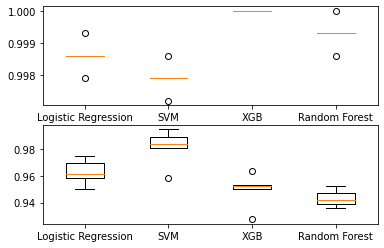








 Boxplot of the accuracy of each model for holes dataset : 

[[0.232428670842032, 0.2219902574808629, 0.23852573018080667, 0.23087621696801114, 0.24339360222531292], [0.23312456506610996, 0.22964509394572025, 0.24478442280945759, 0.24200278164116829, 0.24408901251738527], [0.232428670842032, 0.23173277661795408, 0.24408901251738527, 0.24130737134909597, 0.24339360222531292], [0.23312456506610996, 0.232428670842032, 0.24478442280945759, 0.24200278164116829, 0.24408901251738527]]
[[0.25277777777777777, 0.24722222222222223, 0.181058495821727, 0.2116991643454039, 0.18384401114206128], [0.25277777777777777, 0.24166666666666667, 0.20612813370473537, 0.21727019498607242, 0.18384401114206128], [0.25277777777777777, 0.25555555555555554, 0.20612813370473537, 0.21727019498607242, 0.18384401114206128], [0.25277777777777777, 0.25555555555555554, 0.20612813370473537, 0.21727019498607242, 0.18384401114206128]]


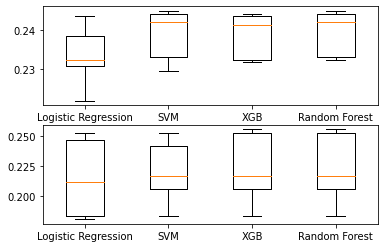








 Boxplot of the accuracy of each model for var_x_y dataset : 

[[0.5873347251217815, 0.5824634655532359, 0.5771905424200278, 0.5917941585535466, 0.5938803894297635], [0.6945024356297843, 0.6951983298538622, 0.6988873435326843, 0.6870653685674548, 0.7065368567454798], [1.0, 1.0, 1.0, 1.0, 1.0], [0.9867780097425192, 0.9895615866388309, 0.9923504867872045, 0.9909596662030598, 0.9909596662030598]]
[[0.5888888888888889, 0.5972222222222222, 0.5487465181058496, 0.5766016713091922, 0.5571030640668524], [0.65, 0.6444444444444445, 0.6044568245125348, 0.6434540389972145, 0.596100278551532], [0.6027777777777777, 0.5722222222222222, 0.5459610027855153, 0.6155988857938719, 0.5403899721448467], [0.5638888888888889, 0.5388888888888889, 0.5487465181058496, 0.5738161559888579, 0.5236768802228412]]


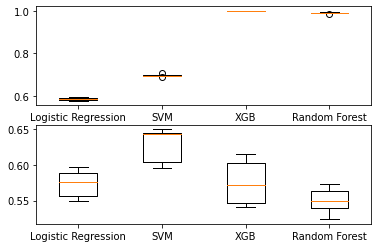








 Boxplot of the accuracy of each model for angle_one_hot dataset : 

[[0.3583855254001392, 0.360473208072373, 0.34840055632823363, 0.3344923504867872, 0.3532684283727399], [0.3583855254001392, 0.360473208072373, 0.34840055632823363, 0.3344923504867872, 0.3532684283727399], [0.3583855254001392, 0.360473208072373, 0.34840055632823363, 0.3344923504867872, 0.3532684283727399], [0.3583855254001392, 0.360473208072373, 0.34840055632823363, 0.3344923504867872, 0.3532684283727399]]
[[0.07777777777777778, 0.1111111111111111, 0.08913649025069638, 0.10027855153203342, 0.116991643454039], [0.07777777777777778, 0.1111111111111111, 0.08913649025069638, 0.10027855153203342, 0.116991643454039], [0.07777777777777778, 0.1111111111111111, 0.08913649025069638, 0.10027855153203342, 0.116991643454039], [0.07777777777777778, 0.1111111111111111, 0.08913649025069638, 0.10027855153203342, 0.116991643454039]]


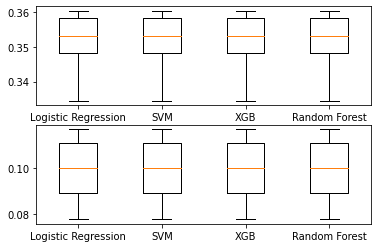








 Boxplot of the accuracy of each model for angle_range dataset : 

[[0.3465553235908142, 0.34933890048712596, 0.34005563282336576, 0.3435326842837274, 0.34492350486787204], [0.3465553235908142, 0.34933890048712596, 0.34005563282336576, 0.3435326842837274, 0.34492350486787204], [0.3451635351426583, 0.34794711203897005, 0.3386648122392211, 0.3428372739916551, 0.3435326842837274], [0.3465553235908142, 0.34933890048712596, 0.33936022253129344, 0.3428372739916551, 0.3435326842837274]]
[[0.325, 0.2972222222222222, 0.34818941504178275, 0.31197771587743733, 0.3286908077994429], [0.325, 0.2972222222222222, 0.34818941504178275, 0.31197771587743733, 0.3286908077994429], [0.325, 0.2972222222222222, 0.34818941504178275, 0.30919220055710306, 0.3286908077994429], [0.325, 0.29444444444444445, 0.34540389972144847, 0.30919220055710306, 0.31197771587743733]]


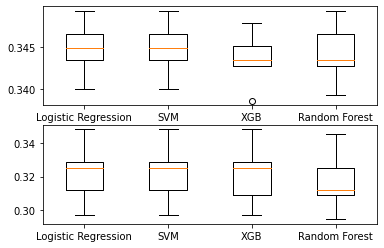








 Boxplot of the accuracy of each model for plain_angle_length dataset : 

[[0.2720946416144746, 0.25400139178844816, 0.2851182197496523, 0.2267037552155772, 0.2635605006954103], [0.40431454418928325, 0.41475295755045233, 0.4040333796940195, 0.39777468706536856, 0.40681502086230875], [0.42519137091162146, 0.43354210160055673, 0.4151599443671766, 0.41863699582753827, 0.41863699582753827], [0.42379958246346555, 0.43145441892832287, 0.41307371349095967, 0.4179415855354659, 0.4172461752433936]]
[[0.2222222222222222, 0.24166666666666667, 0.2785515320334262, 0.2395543175487465, 0.2200557103064067], [0.3861111111111111, 0.33611111111111114, 0.4011142061281337, 0.4178272980501393, 0.362116991643454], [0.3611111111111111, 0.31666666666666665, 0.3983286908077994, 0.3398328690807799, 0.3286908077994429], [0.35, 0.34444444444444444, 0.4178272980501393, 0.29526462395543174, 0.36768802228412256]]


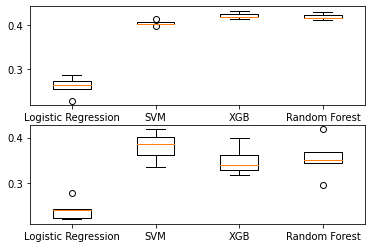

In [ ]:
# training and testing models

dataset_names = ['pixel', 'holes', 'var_x_y', 'angle_one_hot', 'angle_range', 'plain_angle_length']

for i in range(len(datasets)):
    train_test(*datasets[i], models, dataset_names[i])

## t-SNE visualization

Here is just an implementation of t-SNE to have a graphical representation of the data. (May need to be rerun)

In [ ]:
X, y = load_digits(return_X_y=True, as_frame=True)

n_iter = 5000
n_components = 2
verbose = 1
learning_rate = 200
list_of_perplexity = [5 + 5 * i for i in range(10)]

for perplexity in list_of_perplexity:

    tsne = TSNE(n_components=n_components, init='pca', random_state=0, n_jobs=-1, n_iter=n_iter, perplexity=perplexity, verbose=verbose, learning_rate=learning_rate)
    Y_train = tsne.fit_transform(X, y)

    fig = px.scatter(x=Y_train[:,0], y=Y_train[:,1])
    fig.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.899939
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.578445
[t-SNE] KL divergence after 5000 iterations: 0.831584


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.179s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 6.847674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.615444
[t-SNE] KL divergence after 5000 iterations: 0.819150


[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.198s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 7.379091
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.761189
[t-SNE] KL divergence after 5000 iterations: 0.800221


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 7.683243
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.919563
[t-SNE] KL divergence after 5000 iterations: 0.775142


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 7.941372
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.465691
[t-SNE] KL divergence after 5000 iterations: 0.762490


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.202s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121134
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.256783
[t-SNE] KL divergence after 5000 iterations: 0.743032


[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.269055
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.107246
[t-SNE] KL divergence after 5000 iterations: 0.730549


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.394135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.615849
[t-SNE] KL divergence after 5000 iterations: 0.715050


[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.224s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.501992
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.012344
[t-SNE] KL divergence after 5000 iterations: 0.709237


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.000s...
[t-SNE] Computed neighbors for 1797 samples in 0.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.731744
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.451942
[t-SNE] KL divergence after 5000 iterations: 0.700136


# Conclusion

Conclusions:
- Apart from directly using the values of pixels, the variance on x and y axis score the best, followed by the angle ranging and then the plane length and angle dataset, although global performances were not revolutionary.
- Using t-SNE yielded interesting results, clear clusters can be distinguished on some graphs
- The used models are pretty famous ones. Performance issues definitely come from the features used here.


Next steps:
- Cleaning the code: duplicate dataset creation for the moment, other optimizations, more (and more useful) printings and output of information
- Hyperparameter tuning
- Optimization of most promising model
- Other feature engineering
- Combination of different feature columns
- Model voting by taking the mean/median of probabilities of each model with each dataset
- Implementing other models (Deep Neural Network)


Possible tracks of improvement:
- Using 2 longest lines of digits with their angles
- Bigger holes composed of several black pixels (for digit 0 for example)
- Better use of angles, possibly directly matching on a certain range of values

